# TWITTER 

# 1. Twitter API
In this exercise, I extracted tweets from the accounts of two UK politicians, Jeremy Corbin ([@jeremycorbyn](https://twitter.com/jeremycorbyn)) and Theresa May ([@theresa_may](https://twitter.com/theresa_may)). Afterwards, all tweets shall be stored in one combined dataframe and explored with basic analysis.

In [68]:
!pip install python-twitter #install python package

In [2]:
cd "/Volumes/Toshiba/BETUL DERSLER /data-hands-on" 

/Users/betulraylaz/Documents/data-hands-on


In [204]:
with open('twitter_api.txt', 'r') as f:
    keys = f.read().split()  
print(keys[0][:9])

Ku9mshVWV


In [289]:
import twitter
api = twitter.Api(consumer_key = keys[0] ,
                  consumer_secret = keys[1],
                  access_token_key = keys[2],
                  access_token_secret= keys[3],
                 tweet_mode= 'extended', #to import tweets more than 140 characters
                 sleep_on_rate_limit=True) #to stop when we hit the Twitter rate limits.

# 1.a. Jeremy Corbyn

Twitter permits you to take at most 200 tweets in one call. Threfore, I used max_id and since_id parameters
to collect as much as possible. Max_id returns items with IDs equal to or less than so it's inclusive.
since_id returns items with IDs greater than so it's exclusive. 

In [291]:
### realDonaldTrump 
### user id = 

screen_name_user1='jeremy_corbyn'
jc=[] #list of @jeremycorbyn's tweets

jc0=api.GetUserTimeline(screen_name='jeremycorbyn',since_id=1076083792249606144, count=200) 
#in case there is a new tweet

jc1 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1076083792249606144,\
                          since_id=1061366523858694144,count=200)
jc2 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1061366523858694144,\
                          since_id=1049562356571877376,count=200)
jc3 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1049562356571877376,\
                          since_id=1043764620828258304,count=200)
jc4 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1043764620828258304,\
                          since_id=1027968560465956864,count=200)
jc5 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1027968560465956864,\
                          since_id=1011274524665532416,count=200)
jc6 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1011274524665532416,\
                          since_id=1004021258047115265,count=200)
jc7 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=1004021258047115265,\
                          since_id=988507804272128000,count=200)
jc8 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=988507804272128000 ,\
                          since_id=972211494292217856,count=200)
jc9 = api.GetUserTimeline(screen_name='jeremycorbyn',max_id=972211494292217856 ,\
                          since_id=956429734262566912,count=200)
jc10= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=956429734262566912 ,\
                          since_id=936307232353988608,count=200)
jc11= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=936323979358322689 ,\
                          since_id=926086519625891841,count=200)
jc12= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=926086519625891841 ,\
                          since_id=912689720588734464,count=200)
jc13= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=912689720588734464 ,\
                          since_id=900030735515561984,count=200)
jc14= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=900030735515561984 ,\
                          since_id=882354327389704194,count=200)
jc15= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=882354327389704194 ,\
                          since_id=872083892521635842,count=200)
jc16= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=872083892521635842 ,\
                          since_id=867433357315112961, count=200)
jc17= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=867433357315112961 ,\
                          since_id=866753813725708289, count=200)



In [292]:
print(len(jc17))

18


In [293]:
jc18= api.GetUserTimeline(screen_name='jeremycorbyn',max_id=866753813725708289,count=200)
jc18

[Status(ID=866753813725708289, ScreenName=jeremycorbyn, Created=Mon May 22 20:33:07 +0000 2017, Text='Register to vote before midnight tonight "for a Britain #ForTheMany, not the few" says @JermainJackman ‚Üí https://t.co/qXdulxPFk2 #GE2017 https://t.co/A3v637o0gO')]

In [296]:
#make all tweets one list
jc=jc0+jc1+jc2+jc3+jc4+jc5+jc6+jc7+jc8+jc9+jc10+jc11+jc12+jc13+jc14+jc15+jc16+jc17
print(len(jc))
print(type(jc))
print(type(jc[0]))

3204
<class 'list'>
<class 'twitter.models.Status'>


In [297]:
#we create an ID list to check reputations
jc_id = []
for ids in range(len(jc)): #without range function, it repeats the for function again for every tweet. 
    jc_id.append((str(jc[ids].id)))
#enumerate
print(len(jc_id))

3204


In [298]:
# to check if our list has repetitions
def checklist(list):
    for i in list:
        if list.count(i)>1:
            return "You have duplicate tweets"
        else:
            return " Perfect! Every ID is unique"
checklist(jc_id)

' Perfect! Every ID is unique'

In [299]:
import datetime # we will use datetime package to convert data as str to readable format

In [465]:
#we define a function to make a dictionary with wanted variables
parse_list = []
def parse_tweets(user):
    for i in range(len(user)):
        parse_dict = {}
        parse_dict['id'] = user[i].id
        parse_dict['text'] = user[i].full_text
        parse_dict['retweet'] = user[i].retweet_count
        parse_dict['fav']=user[i].favorite_count
        parse_dict['lang']=user[i].lang
        parse_dict['media']=user[i].media
        parse_dict['link']=user[i].urls
        parse_dict['date']=datetime.datetime.strptime(user[i].created_at,'%a %b %d %H:%M:%S %z %Y')
        parse_dict['hashtag']=user[i].hashtags
        parse_list.append(parse_dict)
    return parse_list

jc_dict= parse_tweets(jc)

In [466]:
print(jc_dict[9]['date'])

2018-12-18 17:18:03+00:00


In [467]:
type(jc_dict[9]['date'])

datetime.datetime

In [468]:
print(type(jc_dict))
print(type(jc_dict[2]))
print(len(jc_dict))
# now we have a list consisted of dictionaries which are relevant data about tweets

<class 'list'>
<class 'dict'>
3204


In [469]:
import pandas as pd

In [470]:
%matplotlib inline

In [471]:
!pip install pandas-datareader --upgrade
!pip install --upgrade pip

Requirement already up-to-date: pandas-datareader in /Users/betulraylaz/anaconda3/lib/python3.7/site-packages (0.7.0)
Requirement already up-to-date: pip in /Users/betulraylaz/anaconda3/lib/python3.7/site-packages (18.1)


In [472]:
jc_pd=pd.DataFrame(jc_dict)
jc_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 9 columns):
date       3204 non-null datetime64[ns, UTC]
fav        3204 non-null int64
hashtag    3204 non-null object
id         3204 non-null int64
lang       3204 non-null object
link       3204 non-null object
media      1316 non-null object
retweet    3204 non-null int64
text       3204 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 225.4+ KB


In [516]:
jc_pd.to_csv('jc_dict.tsv', 
            encoding = 'utf-8',
            index = False)

In [517]:
jc_pd = pd.read_csv('jc_dict.tsv',
                encoding = 'utf-8')
len(jc_pd)

3204

In [513]:
jc_pd.to_csv('jc_dict.tsv', 
            encoding = 'utf-8',
            index = False)


In [474]:
jc_pd = pd.read_csv('jc_dict.csv',
                encoding = 'utf-8')
jc_pd.head(5)

date   fav hashtag                   id lang  \
0  2018-12-22 14:39:02+00:00     0      []  1076487279701622785   en   
1  2018-12-22 14:38:49+00:00     0      []  1076487224257114112   en   
2  2018-12-22 08:01:00+00:00  4717      []  1076387111459348481   en   
3  2018-12-21 14:56:13+00:00  6563      []  1076129215156813825   en   
4  2018-12-21 11:55:43+00:00     0      []  1076083792249606144   en   

                                                link  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [URL(URL=https://t.co/PGTV7OJQth, ExpandedURL=...   
4                                                 []   

                                               media  retweet  \
0                                                NaN      104   
1                                                NaN      224   
2  [Media(ID=1076219913423982595, Type=video, Dis...     2233   
3                                                NaN     2820   
4                                                NaN      122   

                                                text  
0  RT @NazLegacy: Great video from @UKLabour lead...  
1  RT @johnmcdonnellMP: 'Economics for the Many' ...  
2  It is a mark of shame that rough sleeping has ...  
3  Today is Ali al-Nimr's 24th birthday. He remai...  
4  RT @Reprieve: Andy Tsege faced a death sentenc...

In [475]:
jc_pd['date'] = pd.to_datetime(jc_pd['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [476]:
jc_pd.date.dt.weekday_name.head()

0    Saturday
1    Saturday
2    Saturday
3      Friday
4      Friday
Name: date, dtype: object

In [477]:
jc_pd['Year'] = jc_pd.date.dt.year # we add key 'Year' and 'Month' to our dictionary
jc_pd['Month'] = jc_pd.date.dt.month
jc_pd['Day']=jc_pd.date.dt.day
jc_pd['WeekDay']=jc_pd.date.dt.weekday
jc_pd.head(5)

date   fav hashtag                   id lang  \
0 2018-12-22 14:39:02+00:00     0      []  1076487279701622785   en   
1 2018-12-22 14:38:49+00:00     0      []  1076487224257114112   en   
2 2018-12-22 08:01:00+00:00  4717      []  1076387111459348481   en   
3 2018-12-21 14:56:13+00:00  6563      []  1076129215156813825   en   
4 2018-12-21 11:55:43+00:00     0      []  1076083792249606144   en   

                                                link  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [URL(URL=https://t.co/PGTV7OJQth, ExpandedURL=...   
4                                                 []   

                                               media  retweet  \
0                                                NaN      104   
1                                                NaN      224   
2  [Media(ID=1076219913423982595, Type=video, Dis...     2233   
3                                                NaN     2820   
4                                                NaN      122   

                                                text  Year  Month  Day  \
0  RT @NazLegacy: Great video from @UKLabour lead...  2018     12   22   
1  RT @johnmcdonnellMP: 'Economics for the Many' ...  2018     12   22   
2  It is a mark of shame that rough sleeping has ...  2018     12   22   
3  Today is Ali al-Nimr's 24th birthday. He remai...  2018     12   21   
4  RT @Reprieve: Andy Tsege faced a death sentenc...  2018     12   21   

   WeekDay  
0        5  
1        5  
2        5  
3        4  
4        4

In [478]:
jc_pd.Year.value_counts()

2018    1868
2017    1336
Name: Year, dtype: int64

In [479]:
jc_pd.Year.value_counts().sort_index()

2017    1336
2018    1868
Name: Year, dtype: int64

In [480]:
jc_pd.Month.value_counts().sort_index()

1     108
2     121
3     124
4     149
5     258
6     536
7     291
8     202
9     534
10    308
11    332
12    241
Name: Month, dtype: int64

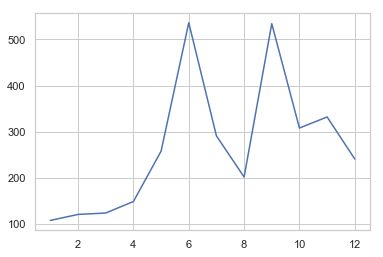

In [481]:
#the graph of tweets in a year based on month
jc_pd.Month.value_counts().sort_index().plot()

jc_pd['Year'] = jc_pd.date.dt.year

In [482]:
jc_pd['lang'].describe()

count     3204
unique       4
top         en
freq      3197
Name: lang, dtype: object

In [493]:
jc_pd.sort_values('date')

date    fav  \
3203 2017-05-22 20:34:40+00:00   2666   
3202 2017-05-22 20:52:57+00:00   2863   
3201 2017-05-22 21:00:00+00:00   1270   
3200 2017-05-22 21:06:12+00:00   1853   
3199 2017-05-22 21:11:04+00:00   1328   
3198 2017-05-22 21:15:14+00:00    622   
3197 2017-05-22 21:20:53+00:00   1790   
3196 2017-05-22 21:26:36+00:00    777   
3195 2017-05-22 21:30:57+00:00   1667   
3194 2017-05-22 21:35:38+00:00    526   
3193 2017-05-22 22:00:02+00:00   1207   
3192 2017-05-22 22:30:02+00:00   1144   
3191 2017-05-22 23:06:23+00:00  57965   
3190 2017-05-23 05:33:17+00:00  16598   
3189 2017-05-23 18:51:11+00:00  15941   
3188 2017-05-24 12:39:41+00:00  29835   
3187 2017-05-24 17:32:13+00:00   5028   
3186 2017-05-24 17:33:23+00:00   3448   
3185 2017-05-24 17:34:20+00:00   3945   
3184 2017-05-24 21:39:31+00:00      0   
3183 2017-05-25 10:08:43+00:00   6009   
3182 2017-05-26 09:06:02+00:00   2855   
3181 2017-05-26 10:04:59+00:00    751   
3180 2017-05-26 11:08:02+00:00   2208   
3179 2017-05-26 13:11:41+00:00   2660   
3178 2017-05-26 13:30:02+00:00   1498   
3177 2017-05-26 13:53:03+00:00   3103   
3176 2017-05-26 13:53:40+00:00   1688   
3175 2017-05-26 13:54:27+00:00   2955   
3174 2017-05-26 14:10:01+00:00   3420   
...                        ...    ...   
29   2018-12-14 12:49:45+00:00      0   
28   2018-12-14 15:12:30+00:00   8398   
27   2018-12-14 16:28:00+00:00   2248   
26   2018-12-14 17:48:00+00:00   2293   
25   2018-12-15 09:27:15+00:00   3141   
24   2018-12-16 13:42:22+00:00      0   
23   2018-12-16 15:28:23+00:00      0   
22   2018-12-16 16:26:10+00:00      0   
21   2018-12-16 17:11:37+00:00   2759   
20   2018-12-16 22:28:45+00:00   1482   
19   2018-12-17 10:40:39+00:00   2600   
18   2018-12-17 10:45:02+00:00      0   
17   2018-12-17 12:29:23+00:00      0   
16   2018-12-17 12:43:36+00:00      0   
15   2018-12-17 12:45:50+00:00   1900   
14   2018-12-17 17:17:04+00:00   3895   
13   2018-12-17 19:15:19+00:00  17292   
12   2018-12-17 22:34:59+00:00      0   
11   2018-12-18 12:06:38+00:00   6925   
10   2018-12-18 15:03:46+00:00      0   
9    2018-12-18 17:18:03+00:00   3208   
8    2018-12-19 14:00:52+00:00  10359   
7    2018-12-20 11:01:11+00:00   4483   
6    2018-12-20 13:57:59+00:00   2421   
5    2018-12-20 18:06:32+00:00  38952   
4    2018-12-21 11:55:43+00:00      0   
3    2018-12-21 14:56:13+00:00   6563   
2    2018-12-22 08:01:00+00:00   4717   
1    2018-12-22 14:38:49+00:00      0   
0    2018-12-22 14:39:02+00:00      0   

                                                hashtag                   id  \
3203                       [Hashtag(Text='ForTheMany')]   866754204274233344   
3202                                                 []   866758805358604288   
3201                                                 []   866760581503569921   
3200                                                 []   866762141835161600   
3199  [Hashtag(Text='ForTheMany'), Hashtag(Text='Cla...   866763364160094208   
3198  [Hashtag(Text='GE2017'), Hashtag(Text='ClaimYo...   866764414707486721   
3197                  [Hashtag(Text='ClaimYourFuture')]   866765835037224961   
3196                  [Hashtag(Text='ClaimYourFuture')]   866767274698575872   
3195                  [Hashtag(Text='ClaimYourFuture')]   866768367126016000   
3194                                                 []   866769546627207168   
3193                                                 []   866775689650774016   
3192                                                 []   866783236545945600   
3191                                                 []   866792385333911555   
3190                                                 []   866889752066314240   
3189                                                 []   867090548200542208   
3188                                                 []   867359446724472833   
3187                                                 []   867433065399939074   
3186                                       

In [502]:
jc_pd.hashtag.value_counts().head(10) #most commonly used hashtags


[]                                 1975
[Hashtag(Text='ForTheMany')]         99
[Hashtag(Text='PMQs')]               89
[Hashtag(Text='Lab18')]              69
[Hashtag(Text='Lab17')]              56
[Hashtag(Text='LabourLive')]         30
[Hashtag(Text='GE2017')]             22
[Hashtag(Text='VoteLabour')]         20
[Hashtag(Text='Marr')]               14
[Hashtag(Text='MakeHomesSafe')]      13
Name: hashtag, dtype: int64

In [378]:
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid')

In [464]:
jc_pd2 = jc_pd.reset_index() # multi-index as variables
jc_pd2.columns = ['','date','fav','hashtag','id', 'lang','link','media', 'rt','text','Year','Month','Day','WeekDay'] # rename columns
jc_pd2.rt = jc_pd.retweet.astype(int) # convert variables to integer
jc_pd2.id = jc_pd.id.astype(int)
jc_pd2.date = jc_pd.date.astype(int)
jc_pd2.Year = jc_pd.Year.astype(int)
jc_pd2.Month = jc_pd.Month.astype(int) 
jc_pd2.Day = jc_pd.Day.astype(int) 
jc_pd2.head()

date   fav hashtag                   id lang  \
0  0  1545489542000000000     0      []  1076487279701622785   en   
1  1  1545489529000000000     0      []  1076487224257114112   en   
2  2  1545465660000000000  4717      []  1076387111459348481   en   
3  3  1545404173000000000  6563      []  1076129215156813825   en   
4  4  1545393343000000000     0      []  1076083792249606144   en   

                                                link  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [URL(URL=https://t.co/PGTV7OJQth, ExpandedURL=...   
4                                                 []   

                                               media    rt  \
0                                                NaN   104   
1                                                NaN   224   
2  [Media(ID=1076219913423982595, Type=video, Dis...  2233   
3                                                NaN  2820   
4                                                NaN   122   

                                                text  Year  Month  Day  \
0  RT @NazLegacy: Great video from @UKLabour lead...  2018     12   22   
1  RT @johnmcdonnellMP: 'Economics for the Many' ...  2018     12   22   
2  It is a mark of shame that rough sleeping has ...  2018     12   22   
3  Today is Ali al-Nimr's 24th birthday. He remai...  2018     12   21   
4  RT @Reprieve: Andy Tsege faced a death sentenc...  2018     12   21   

   WeekDay  
0        5  
1        5  
2        5  
3        4  
4        4

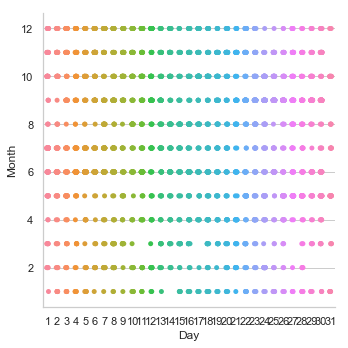

In [389]:
sns.catplot(x = 'Day', y = 'Month', data = jc_pd2,height=5)
#Jeremy Corbyn usually tweets everyday

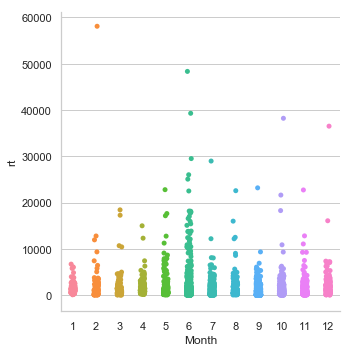

In [506]:
sns.catplot(x = 'Month', y = 'rt', data = jc_pd2,height=5)
#his retweet graph

In [1]:
sns.catplot(x = 'rt', y = 'fav', data = jc_pd2,height=5)

NameError: name 'sns' is not defined

# 1.b. Theresa May

In [394]:
tm=[]
tm0=api.GetUserTimeline(screen_name='theresa_may',since_id=1075852272096161792, count=200) 
#in case there is a new tweet

tm1 = api.GetUserTimeline(screen_name='theresa_may',max_id=1075852272096161792,\
                         since_id=1050730068111179777, count=200)

tm2 = api.GetUserTimeline(screen_name='theresa_may',max_id=1050730068111179777,\
                          since_id=1014500545850208256,count=200)

tm3 = api.GetUserTimeline(screen_name='theresa_may',max_id=1014500545850208256,\
                          since_id=978357619579674626,count=200)

tm4 = api.GetUserTimeline(screen_name='theresa_may',max_id=978357619579674626,\
                          since_id=948606757437427713,count=200)


tm5 = api.GetUserTimeline(screen_name='theresa_may',max_id=948606757437427713,\
                          since_id=920551955218432000,count=200)

tm6 = api.GetUserTimeline(screen_name='theresa_may',max_id=920551955218432000,\
                          since_id=751436600689721344,count=200)

tm7 = api.GetUserTimeline(screen_name='theresa_may',max_id=751436600689721344,count=200)

tm=tm0+tm1+tm2+tm3+tm4+tm5+tm6+tm7
len(tm)

1314

In [446]:
parse_list_tm = []
def parse_tweets(user):
    for i in range(len(user)):
        parse_dict = {}
        parse_dict['id'] = user[i].id
        parse_dict['text'] = user[i].full_text
        parse_dict['retweet'] = user[i].retweet_count
        parse_dict['fav']=user[i].favorite_count
        parse_dict['lang']=user[i].lang
        parse_dict['media']=user[i].media
        parse_dict['link']=user[i].urls
        parse_dict['date']=datetime.datetime.strptime(user[i].created_at, '%a %b %d %H:%M:%S %z %Y')
        parse_dict['hashtag']=user[i].hashtags
        parse_list_tm.append(parse_dict)
    return parse_list_tm


tm_dict= parse_tweets(tm)
tm_dict[9]
len(tm_dict)


1314

In [396]:
tm_id=[]
for id_ in range(len(tm)): #without range function, it repeats the for function again for every tweet. 
    tm_id.append((tm[id_].id)) 

In [397]:
# to check if our list has repetitions
def checklist(list):
    for i in list:
        if list.count(i)>1:
            return "You have duplicate tweets"
        else:
            return " Perfect! Every ID is unique"
checklist(tm_id)

' Perfect! Every ID is unique'

In [410]:
tm_pd=pd.DataFrame(tm_dict)
tm_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 9 columns):
date       1314 non-null datetime64[ns, UTC]
fav        1314 non-null int64
hashtag    1314 non-null object
id         1314 non-null int64
lang       1314 non-null object
link       1314 non-null object
media      574 non-null object
retweet    1314 non-null int64
text       1314 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 92.5+ KB


In [518]:
tm_pd.to_csv('tm_dict.tsv', 
            encoding = 'utf-8',
            index = False)

In [519]:
tm_pd = pd.read_csv('tm_dict.tsv',
                encoding = 'utf-8')
tm_pd.head(67) # I could not find another command specific for .tsv file but only .csv commands were used in Google.\
#so if in anycase I did it wrong I also added csv codes

date   fav  \
0   2018-12-20 20:35:44+00:00     0   
1   2018-12-20 19:24:44+00:00     0   
2   2018-12-19 14:31:22+00:00   491   
3   2018-12-19 11:33:39+00:00  2930   
4   2018-12-18 16:17:47+00:00  1743   
5   2018-12-18 10:59:54+00:00   532   
6   2018-12-17 15:31:40+00:00     0   
7   2018-12-17 12:21:46+00:00  1222   
8   2018-12-17 10:15:52+00:00  1110   
9   2018-12-14 19:35:03+00:00  1165   
10  2018-12-14 17:21:54+00:00  4202   
11  2018-12-14 13:19:22+00:00     0   
12  2018-12-13 17:35:01+00:00  2120   
13  2018-12-13 14:03:33+00:00     0   
14  2018-12-12 13:44:09+00:00  2822   
15  2018-12-11 22:41:37+00:00  5863   
16  2018-12-11 17:17:34+00:00     0   
17  2018-12-11 15:07:02+00:00     0   
18  2018-12-11 15:02:10+00:00     0   
19  2018-12-10 15:33:46+00:00     0   
20  2018-12-10 09:31:53+00:00   870   
21  2018-12-09 20:24:56+00:00     0   
22  2018-12-08 14:26:54+00:00   730   
23  2018-12-08 11:33:28+00:00   362   
24  2018-12-08 09:28:07+00:00  1222   
25  2018-12-07 22:03:35+00:00  1315   
26  2018-12-07 16:30:03+00:00   542   
27  2018-12-06 20:40:30+00:00     0   
28  2018-12-06 16:18:07+00:00   717   
29  2018-12-06 15:58:18+00:00  1542   
..                        ...   ...   
37  2018-12-03 17:39:37+00:00  1519   
38  2018-12-03 15:34:52+00:00     0   
39  2018-12-03 15:34:00+00:00   676   
40  2018-12-03 14:12:16+00:00  1290   
41  2018-12-03 13:52:32+00:00   436   
42  2018-12-03 11:47:10+00:00  1798   
43  2018-12-03 11:04:22+00:00     0   
44  2018-12-03 10:23:43+00:00   583   
45  2018-12-02 22:11:24+00:00  1557   
46  2018-12-02 17:48:55+00:00     0   
47  2018-12-02 17:03:59+00:00  1363   
48  2018-12-02 14:21:46+00:00   323   
49  2018-12-02 11:39:41+00:00  1166   
50  2018-12-01 21:08:47+00:00     0   
51  2018-12-01 19:38:10+00:00     0   
52  2018-12-01 18:04:36+00:00     0   
53  2018-12-01 18:04:35+00:00     0   
54  2018-12-01 13:13:49+00:00   483   
55  2018-12-01 12:13:35+00:00     0   
56  2018-12-01 10:31:44+00:00  2340   
57  2018-12-01 08:33:35+00:00  1086   
58  2018-11-30 23:18:53+00:00     0   
59  2018-11-30 18:05:41+00:00   256   
60  2018-11-30 12:46:42+00:00  2362   
61  2018-11-30 09:47:41+00:00   652   
62  2018-11-30 07:58:11+00:00     0   
63  2018-11-29 16:14:34+00:00   767   
64  2018-11-28 21:44:18+00:00     0   
65  2018-11-28 15:10:22+00:00  2279   
66  2018-11-28 11:54:09+00:00   663   

                                              hashtag                   id  \
0                                                  []  1075852272096161792   
1                                                  []  1075834404944142336   
2                                                  []  1075398188629147654   
3                                                  []  1075353464337784832   
4                                                  []  1075062580039831553   
5             [Hashtag(Text='25yearenvironmentplan')]  1074982580968136704   
6                                                  []  1074688587369771009   
7                    [Hashtag(Text='TollFreeSevern')]  1074640797327339520   
8                                                  []  1074609114280587264   
9                                                  []  1073662672716132353   
10                                                 []  1073629164639543296   
11                                                 []  1073568130075631617   
12                                                 []  1073270078509105152   
13                                                 []  1073216859925819392   
14                             [Hashtag(Text='PMQs')]  1072849588376231936   
15                                                 []  1072622458954543105   
16                                                 []  1072540908581720065   
17                                                 []  1072508061821091840   
18                                                 []  1072506833716305925   
19                                            

In [411]:
tm_pd.to_csv('tm_dict.csv', 
            encoding = 'utf-8',
            index = False)

In [412]:
tm_pd = pd.read_csv('tm_dict.csv',
                encoding = 'utf-8')
tm_pd.head(67)

date   fav  \
0   2018-12-20 20:35:44+00:00     0   
1   2018-12-20 19:24:44+00:00     0   
2   2018-12-19 14:31:22+00:00   491   
3   2018-12-19 11:33:39+00:00  2930   
4   2018-12-18 16:17:47+00:00  1743   
5   2018-12-18 10:59:54+00:00   532   
6   2018-12-17 15:31:40+00:00     0   
7   2018-12-17 12:21:46+00:00  1222   
8   2018-12-17 10:15:52+00:00  1110   
9   2018-12-14 19:35:03+00:00  1165   
10  2018-12-14 17:21:54+00:00  4202   
11  2018-12-14 13:19:22+00:00     0   
12  2018-12-13 17:35:01+00:00  2120   
13  2018-12-13 14:03:33+00:00     0   
14  2018-12-12 13:44:09+00:00  2822   
15  2018-12-11 22:41:37+00:00  5863   
16  2018-12-11 17:17:34+00:00     0   
17  2018-12-11 15:07:02+00:00     0   
18  2018-12-11 15:02:10+00:00     0   
19  2018-12-10 15:33:46+00:00     0   
20  2018-12-10 09:31:53+00:00   870   
21  2018-12-09 20:24:56+00:00     0   
22  2018-12-08 14:26:54+00:00   730   
23  2018-12-08 11:33:28+00:00   362   
24  2018-12-08 09:28:07+00:00  1222   
25  2018-12-07 22:03:35+00:00  1315   
26  2018-12-07 16:30:03+00:00   542   
27  2018-12-06 20:40:30+00:00     0   
28  2018-12-06 16:18:07+00:00   717   
29  2018-12-06 15:58:18+00:00  1542   
..                        ...   ...   
37  2018-12-03 17:39:37+00:00  1519   
38  2018-12-03 15:34:52+00:00     0   
39  2018-12-03 15:34:00+00:00   676   
40  2018-12-03 14:12:16+00:00  1290   
41  2018-12-03 13:52:32+00:00   436   
42  2018-12-03 11:47:10+00:00  1798   
43  2018-12-03 11:04:22+00:00     0   
44  2018-12-03 10:23:43+00:00   583   
45  2018-12-02 22:11:24+00:00  1557   
46  2018-12-02 17:48:55+00:00     0   
47  2018-12-02 17:03:59+00:00  1363   
48  2018-12-02 14:21:46+00:00   323   
49  2018-12-02 11:39:41+00:00  1166   
50  2018-12-01 21:08:47+00:00     0   
51  2018-12-01 19:38:10+00:00     0   
52  2018-12-01 18:04:36+00:00     0   
53  2018-12-01 18:04:35+00:00     0   
54  2018-12-01 13:13:49+00:00   483   
55  2018-12-01 12:13:35+00:00     0   
56  2018-12-01 10:31:44+00:00  2340   
57  2018-12-01 08:33:35+00:00  1086   
58  2018-11-30 23:18:53+00:00     0   
59  2018-11-30 18:05:41+00:00   256   
60  2018-11-30 12:46:42+00:00  2362   
61  2018-11-30 09:47:41+00:00   652   
62  2018-11-30 07:58:11+00:00     0   
63  2018-11-29 16:14:34+00:00   767   
64  2018-11-28 21:44:18+00:00     0   
65  2018-11-28 15:10:22+00:00  2279   
66  2018-11-28 11:54:09+00:00   663   

                                              hashtag                   id  \
0                                                  []  1075852272096161792   
1                                                  []  1075834404944142336   
2                                                  []  1075398188629147654   
3                                                  []  1075353464337784832   
4                                                  []  1075062580039831553   
5             [Hashtag(Text='25yearenvironmentplan')]  1074982580968136704   
6                                                  []  1074688587369771009   
7                    [Hashtag(Text='TollFreeSevern')]  1074640797327339520   
8                                                  []  1074609114280587264   
9                                                  []  1073662672716132353   
10                                                 []  1073629164639543296   
11                                                 []  1073568130075631617   
12                                                 []  1073270078509105152   
13                                                 []  1073216859925819392   
14                             [Hashtag(Text='PMQs')]  1072849588376231936   
15                                                 []  1072622458954543105   
16                                                 []  1072540908581720065   
17                                                 []  1072508061821091840   
18                                                 []  1072506833716305925   
19                                            

In [418]:
tm_pd['date'] = pd.to_datetime(tm_pd['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

tm_pd['Year'] = tm_pd.date.dt.year # we add key 'Year' and 'Month' to our dictionary
tm_pd['Month'] = tm_pd.date.dt.month
tm_pd['Day']=tm_pd.date.dt.day
tm_pd['WeekDay']=tm_pd.date.dt.weekday
tm_pd.head(5)

In [457]:
tm_pd2 = tm_pd.reset_index() # multi-index as variables
tm_pd2.columns = ['','date','fav','hashtag','id', 'lang','link','media', 'rt','text','Year','Month','Day','WeekDay'] # rename columns
tm_pd2.rt = tm_pd.retweet.astype(int) # convert variables to integer
tm_pd2.id = tm_pd.id.astype(int) 
tm_pd2.date = tm_pd.date.astype(int) 
tm_pd2.Year = tm_pd.Year.astype(int) 
tm_pd2.Month = tm_pd.Month.astype(int) 
tm_pd2.Day = tm_pd.Day.astype(int) 
tm_pd2.head()

date   fav hashtag                   id lang link  \
0  0  1545338144000000000     0      []  1075852272096161792   en   []   
1  1  1545333884000000000     0      []  1075834404944142336   en   []   
2  2  1545229882000000000   491      []  1075398188629147654   en   []   
3  3  1545219219000000000  2930      []  1075353464337784832   en   []   
4  4  1545149867000000000  1743      []  1075062580039831553   en   []   

                                               media   rt  \
0                                                NaN  261   
1                                                NaN   94   
2  [Media(ID=1075398171847741440, Type=photo, Dis...  117   
3  [Media(ID=1075353457563983873, Type=photo, Dis...  699   
4  [Media(ID=1075061326848897026, Type=video, Dis...  339   

                                                text  Year  Month  Day  \
0  RT @10DowningStreet: ‚ÄúToday we add a new page ...  2018     12   20   
1  RT @10DowningStreet: PM @Theresa_May welcomed ...  2018     12   20   
2  Many congratulations to @MarioCreatura on bein...  2018     12   19   
3  For the first time in decades we‚Äôll have full ...  2018     12   19   
4  At a time when most people are looking forward...  2018     12   18   

   WeekDay  
0        3  
1        3  
2        2  
3        2  
4        1

In [520]:
tm_pd['retweet'].describe()

count     1314.000000
mean       434.773973
std       1123.008245
min         11.000000
25%        131.000000
50%        250.500000
75%        439.500000
max      24579.000000
Name: retweet, dtype: float64

In [521]:
tm_pd['fav'].describe()

count     1314.000000
mean      1019.675038
std       3241.248364
min          0.000000
25%          0.000000
50%        394.000000
75%       1250.000000
max      96389.000000
Name: fav, dtype: float64

In [509]:
tm_pd.hashtag.value_counts().head(10) #most commonly used hashtags

[]                                     894
[Hashtag(Text='TM4PM')]                 22
[Hashtag(Text='BackTheBrexitDeal')]     21
[Hashtag(Text='CPC18')]                 20
[Hashtag(Text='PMQs')]                  20
[Hashtag(Text='PMinChina')]             13
[Hashtag(Text='Peston')]                12
[Hashtag(Text='Budget2017')]            10
[Hashtag(Text='RoadtoBrexit')]           9
[Hashtag(Text='G7')]                     7
Name: hashtag, dtype: int64

In [460]:
tm_pd.sort_values('id') # in the original dict( tm_dict) the tweets that has higher id values were in the top

date   fav  \
1313 2016-06-30 08:05:36+00:00   824   
1312 2016-06-30 16:33:10+00:00   497   
1311 2016-07-01 09:37:17+00:00   205   
1310 2016-07-01 16:57:41+00:00   135   
1309 2016-07-02 14:57:34+00:00     0   
1308 2016-07-02 15:14:33+00:00     0   
1307 2016-07-02 15:30:10+00:00     0   
1306 2016-07-02 15:48:29+00:00     0   
1305 2016-07-02 16:32:20+00:00     0   
1304 2016-07-02 18:54:08+00:00   140   
1303 2016-07-02 19:39:16+00:00     0   
1302 2016-07-02 19:39:42+00:00     0   
1301 2016-07-02 20:06:46+00:00     0   
1300 2016-07-02 20:29:05+00:00    47   
1299 2016-07-02 20:46:14+00:00     0   
1298 2016-07-03 08:07:55+00:00    40   
1297 2016-07-03 08:34:41+00:00    46   
1296 2016-07-03 09:07:12+00:00    31   
1295 2016-07-03 09:08:34+00:00    54   
1294 2016-07-03 09:09:37+00:00    48   
1293 2016-07-03 09:10:44+00:00    39   
1292 2016-07-03 09:14:18+00:00    52   
1291 2016-07-03 09:15:34+00:00    50   
1290 2016-07-03 09:16:08+00:00    51   
1289 2016-07-03 09:23:03+00:00    36   
1288 2016-07-03 09:24:38+00:00    43   
1287 2016-07-03 09:32:46+00:00     0   
1286 2016-07-03 09:33:22+00:00     0   
1285 2016-07-03 09:33:59+00:00     0   
1284 2016-07-03 09:34:12+00:00    41   
...                        ...   ...   
29   2018-12-06 15:58:18+00:00  1542   
28   2018-12-06 16:18:07+00:00   717   
27   2018-12-06 20:40:30+00:00     0   
26   2018-12-07 16:30:03+00:00   542   
25   2018-12-07 22:03:35+00:00  1315   
24   2018-12-08 09:28:07+00:00  1222   
23   2018-12-08 11:33:28+00:00   362   
22   2018-12-08 14:26:54+00:00   730   
21   2018-12-09 20:24:56+00:00     0   
20   2018-12-10 09:31:53+00:00   870   
19   2018-12-10 15:33:46+00:00     0   
18   2018-12-11 15:02:10+00:00     0   
17   2018-12-11 15:07:02+00:00     0   
16   2018-12-11 17:17:34+00:00     0   
15   2018-12-11 22:41:37+00:00  5863   
14   2018-12-12 13:44:09+00:00  2822   
13   2018-12-13 14:03:33+00:00     0   
12   2018-12-13 17:35:01+00:00  2120   
11   2018-12-14 13:19:22+00:00     0   
10   2018-12-14 17:21:54+00:00  4202   
9    2018-12-14 19:35:03+00:00  1165   
8    2018-12-17 10:15:52+00:00  1110   
7    2018-12-17 12:21:46+00:00  1222   
6    2018-12-17 15:31:40+00:00     0   
5    2018-12-18 10:59:54+00:00   532   
4    2018-12-18 16:17:47+00:00  1743   
3    2018-12-19 11:33:39+00:00  2930   
2    2018-12-19 14:31:22+00:00   491   
1    2018-12-20 19:24:44+00:00     0   
0    2018-12-20 20:35:44+00:00     0   

                                                hashtag                   id  \
1313                                                 []   748427251713187840   
1312                                                 []   748554982773895168   
1311                                                 []   748812712948342784   
1310                                                 []   748923542264246272   
1309  [Hashtag(Text='wato'), Hashtag(Text='TheresaMa...   749255703068422144   
1308                      [Hashtag(Text='BonneChance')]   749259976925782018   
1307                                                 []   749263904413405184   
1306                                                 []   749268516377767937   
1305                                                 []   749279549406507008   
1304                                                 []   749315235815821312   
1303                                                 []   749326595026980864   
1302  [Hashtag(Text='MPSupermarketSurgery'), Hashtag...   749326701470121986   
1301                                                 []   749333516467441664   
1300   [Hashtag(Text='Twibbon'), Hashtag(Text='TM4PM')]   749339131591979009   
1299                                                 []   749343445626519552   
1298                                                 []   749514997424877568   
1297                           [Hashtag(Text='Peston')]   749521734278144000   
1296                           [Hashtag(Text='Peston')]   749529915146502144   
1295                     

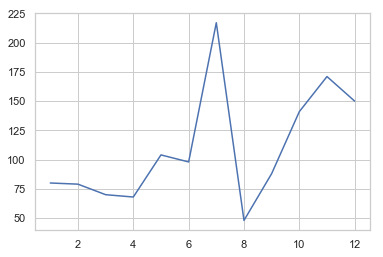

In [556]:
#the graph of tweets in two years based on month
tm_pd2.Month.value_counts().sort_index().plot()

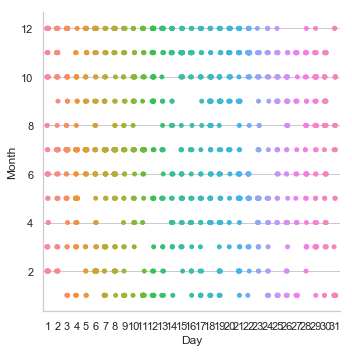

In [550]:
sns.catplot(x = 'Day', y = 'Month', data = tm_pd2,height=5)
#Theresa May does not tweet as much as Jeremy Corbyn does. (There are holes in day-month matches)

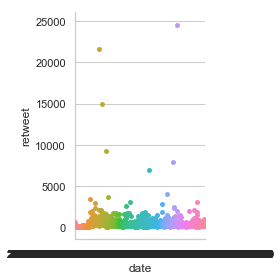

In [552]:
sns.catplot(x = 'date', y = 'retweet', data = tm_pd2,height=4) #distribution of retweet counts to date

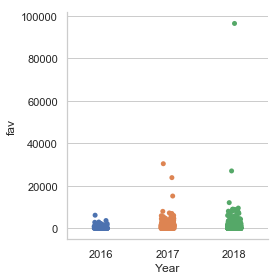

In [522]:
sns.catplot(x = 'Year', y = 'fav', data = tm_pd2,height=4) #distribution of favorite counts to year

# 2. NEWS API

###### News api is a source you can find many articles.  source=https://newsapi.org/
##### I will search for Brexit news for two weeks. (The free api address can collect data only from one month ago)

In [526]:
!pip install newsapi-python

In [528]:
from newsapi import NewsApiClient

In [529]:
with open('news_api.txt', 'r') as f:
    keys = f.read().split()  
print(keys[0][:9])

{\rtf1\an


In [530]:
apiKey = NewsApiClient(api_key=keys[0])

In [531]:
import requests

##### News Api allows to collect 20 articles per request, and they do not have any variable like max_id etc. So I decided to collect 20 articles per day. 

In [532]:
#top 20 articles about Brexit everyday for last 2 weeks
#news api permits to call 20 articles per one request

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-22&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex1_ = requests.get(url)
brex_ne1=brex1_.json()
brex_ne1
brex_news1=brex_ne1.get('articles')
len(brex_news1)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-21&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex2_ = requests.get(url)
brex_ne2=brex2_.json()
brex_ne2
brex_news2=brex_ne2.get('articles')


url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-20&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex3_ = requests.get(url)
brex_ne3=brex3_.json()
brex_ne3
brex_news3=brex_ne3.get('articles')

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-19&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex4_ = requests.get(url)
brex_ne4=brex4_.json()
brex_ne4
brex_news4=brex_ne4.get('articles')


url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-18&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex4_ = requests.get(url)
brex_ne4=brex4_.json()
brex_ne4
brex_news4=brex_ne4.get('articles')
len(brex_news4)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-17&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex5_ = requests.get(url)
brex_ne5=brex5_.json()
brex_ne5
brex_news5=brex_ne5.get('articles')
len(brex_news5)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-16&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex6_ = requests.get(url)
brex_ne6=brex6_.json()
brex_ne6
brex_news6=brex_ne6.get('articles')
len(brex_news6)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-15&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex7_ = requests.get(url)
brex_ne7=brex7_.json()
brex_ne7
brex_news7=brex_ne7.get('articles')
len(brex_news7)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-14&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex8_ = requests.get(url)
brex_ne8=brex8_.json()
brex_ne8
brex_news8=brex_ne8.get('articles')
len(brex_news8)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-13&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex9_ = requests.get(url)
brex_ne9=brex9_.json()
brex_ne9
brex_news9=brex_ne9.get('articles')
len(brex_news9)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-12&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex10_ = requests.get(url)
brex_ne10=brex10_.json()
brex_ne10
brex_news10=brex_ne10.get('articles')
len(brex_news10)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-11&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex11_ = requests.get(url)
brex11_ne=brex11_.json()
brex11_ne
brex_news11=brex11_ne.get('articles')
len(brex_news11)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-10&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex12_ = requests.get(url)
brex_ne12=brex12_.json()
brex_ne12
brex_news12=brex_ne12.get('articles')
len(brex_news12)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-09&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex_13 = requests.get(url)
brex_ne13=brex_13.json()
brex_ne13
brex_news13=brex_ne13.get('articles')
len(brex_news13)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-08&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex_14 = requests.get(url)
brex_ne14=brex_14.json()
brex_ne14
brex_news14=brex_ne14.get('articles')
len(brex_news14)

url = ('https://newsapi.org/v2/everything?'
       'q=brexit&'
       'from=2018-12-07&'
       'sortBy=popularity&'
       'apiKey=aacff07e1bf84606a7070ff1e018fa03')

brex_15 = requests.get(url)
brex_ne15=brex_15.json()
brex_ne15
brex_news15=brex_ne15.get('articles')
len(brex_news15)

brex_news=brex_news1+brex_news2+brex_news3+brex_news4+brex_news5+brex_news6+brex_news7+brex_news8+brex_news9+\
brex_news10+brex_news11+brex_news12+brex_news13+brex_news14+brex_news15
len(brex_news)


type(brex_news[1]['publishedAt'])

str

In [533]:
import pandas as pd

In [534]:
brex_news_pd=pd.DataFrame(brex_news)
brex_news_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
author         286 non-null object
content        291 non-null object
description    297 non-null object
publishedAt    300 non-null object
source         300 non-null object
title          300 non-null object
url            300 non-null object
urlToImage     297 non-null object
dtypes: object(8)
memory usage: 18.8+ KB


In [536]:
brex_news_pd.to_csv('brex_news.csv', 
            encoding = 'utf-8',
            index = False)

brex_news_pd = pd.read_csv('brex_news.csv',
                encoding = 'utf-8')
brex_news_pd.head(5)

author                                            content  \
0   Damien Gayle  George Osborne has said that a general electio...   
1  Frankie Boyle  Consider the plight of the satirist. I know yo...   
2         BeauHD  "Hey Ivan, check your six."\r\n-- Sidewinder m...   
3     Adam Payne  LONDON ‚Äî The People's Vote campaign for a seco...   
4   Mattha Busby  Jeremy Corbyn has been criticised by remain su...   

                                         description           publishedAt  \
0  Former chancellor says Brexit issue is likely ...  2018-12-22T11:06:52Z   
1  It‚Äôs been tough to find much to laugh about th...  2018-12-22T08:00:22Z   
2  An anonymous reader quotes a report from Gizmo...  2018-12-22T00:10:00Z   
3  The People's Vote campaign is preparing for ke...  2018-12-22T08:30:00Z   
4  Labour leader, who vowed to get better deal fr...  2018-12-22T14:58:50Z   

                                              source  \
0  {'id': 'the-guardian-au', 'name': 'The Guardia...   
1  {'id': 'the-guardian-au', 'name': 'The Guardia...   
2               {'id': None, 'name': 'Slashdot.org'}   
3  {'id': 'business-insider', 'name': 'Business I...   
4  {'id': 'the-guardian-au', 'name': 'The Guardia...   

                                               title  \
0  George Osborne: 2019 election is 'under-report...   
1  Frankie Boyle‚Äôs review of 2018: 'Let's forget ...   
2  Big Ben Brought Back To Life Through Snapchat ...   
3  How the People's Vote campaign is preparing fo...   
4  Remainers condemn Jeremy Corbyn pledge to push...   

                                                 url  \
0  https://www.theguardian.com/politics/2018/dec/...   
1  https://www.theguardian.com/politics/2018/dec/...   
2  https://news.slashdot.org/story/18/12/21/22020...   
3  https://www.businessinsider.com/peoples-vote-a...   
4  https://www.theguardian.com/politics/2018/dec/...   

                                          urlToImage  
0  https://i.guim.co.uk/img/media/68b041247288166...  
1  https://i.guim.co.uk/img/media/aa8cfdbfbdf24b8...  
2             https://a.fsdn.com/sd/topics/uk_64.png  
3  https://amp.businessinsider.com/images/5c1cf3f...  
4  https://i.guim.co.uk/img/media/ff5194d73d92193...

In [538]:
brex_news_pd['author'].describe()

count                                  286
unique                                  64
top       https://www.facebook.com/bbcnews
freq                                    33
Name: author, dtype: object

In [ ]:
brex_news_pd.sort_values('publishedAt')

In [ ]:
brex_news[0]['publishedAt']

In [539]:
publishtimes=[]
for i in range(len(brex_news)):
               publishtimes.append(datetime.datetime.strptime(brex_news[i]['publishedAt'],'%Y-%m-%dT%H:%M:%SZ'))

publishtimes

[datetime.datetime(2018, 12, 22, 11, 6, 52),
 datetime.datetime(2018, 12, 22, 8, 0, 22),
 datetime.datetime(2018, 12, 22, 0, 10),
 datetime.datetime(2018, 12, 22, 8, 30),
 datetime.datetime(2018, 12, 22, 14, 58, 50),
 datetime.datetime(2018, 12, 22, 0, 1, 13),
 datetime.datetime(2018, 12, 22, 9, 59, 24),
 datetime.datetime(2018, 12, 22, 13, 0, 15),
 datetime.datetime(2018, 12, 22, 8, 3, 4),
 datetime.datetime(2018, 12, 22, 14, 43, 23),
 datetime.datetime(2018, 12, 22, 19, 23, 47),
 datetime.datetime(2018, 12, 22, 10, 0, 14),
 datetime.datetime(2018, 12, 22, 9, 0, 53),
 datetime.datetime(2018, 12, 22, 18, 17, 54),
 datetime.datetime(2018, 12, 22, 5, 0),
 datetime.datetime(2018, 12, 22, 10, 0),
 datetime.datetime(2018, 12, 22, 16, 1, 33),
 datetime.datetime(2018, 12, 22, 2, 19, 36),
 datetime.datetime(2018, 12, 22, 15, 48),
 datetime.datetime(2018, 12, 22, 10, 0, 11),
 datetime.datetime(2018, 12, 21, 15, 5, 57),
 datetime.datetime(2018, 12, 21, 18, 5, 16),
 datetime.datetime(2018, 12, 21

In [540]:
brex_news_pd['publishedAt'][0]

brex_news_pd['publishedAt'] = pd.to_datetime(publishtimes, format='%Y-%m-%dT%H:%M:%SZ', utc=True)

brex_news_pd['publishedAt'][0]

Timestamp('2018-12-22 11:06:52')

In [541]:
#If I had access to more than 20 articles per request, I could use those datetime functions to create a variable for
#year or month. However, I already collected data based on date: 20 articles per day for two indicated weeks. 
brex_news_pd.publishedAt.dt.weekday_name.head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: publishedAt, dtype: object

In [542]:
brex_news_mpl = brex_news_pd.reset_index() # multi-index as variables
brex_news_mpl.columns = ['','author','content','description','publishedAt', 'source','title','url', 'urlToImage'] 
brex_news_mpl.head(2)

author                                            content  \
0  0   Damien Gayle  George Osborne has said that a general electio...   
1  1  Frankie Boyle  Consider the plight of the satirist. I know yo...   

                                         description         publishedAt  \
0  Former chancellor says Brexit issue is likely ... 2018-12-22 11:06:52   
1  It‚Äôs been tough to find much to laugh about th... 2018-12-22 08:00:22   

                                              source  \
0  {'id': 'the-guardian-au', 'name': 'The Guardia...   
1  {'id': 'the-guardian-au', 'name': 'The Guardia...   

                                               title  \
0  George Osborne: 2019 election is 'under-report...   
1  Frankie Boyle‚Äôs review of 2018: 'Let's forget ...   

                                                 url  \
0  https://www.theguardian.com/politics/2018/dec/...   
1  https://www.theguardian.com/politics/2018/dec/...   

                                          urlToImage  
0  https://i.guim.co.uk/img/media/68b041247288166...  
1  https://i.guim.co.uk/img/media/aa8cfdbfbdf24b8...

In [544]:
brex_news_mpl.source.value_counts() #the news source counts

{'id': 'the-new-york-times', 'name': 'The New York Times'}    109
{'id': 'bbc-news', 'name': 'BBC News'}                         33
{'id': 'the-guardian-au', 'name': 'The Guardian (AU)'}         32
{'id': 'techcrunch', 'name': 'TechCrunch'}                     28
{'id': 'mashable', 'name': 'Mashable'}                         28
{'id': 'reuters', 'name': 'Reuters'}                           22
{'id': 'cnn', 'name': 'CNN'}                                   16
{'id': None, 'name': 'Gizmodo.com'}                            12
{'id': 'business-insider', 'name': 'Business Insider'}          4
{'id': None, 'name': 'Slashdot.org'}                            3
{'id': 'bloomberg', 'name': 'Bloomberg'}                        3
{'id': None, 'name': 'Qz.com'}                                  2
{'id': None, 'name': 'Faz.net'}                                 2
{'id': 'the-telegraph', 'name': 'The Telegraph'}                1
{'id': None, 'name': 'Yahoo.com'}                               1
{'id': Non

In [545]:
brex_news_mpl.author.value_counts() #author counts

https://www.facebook.com/bbcnews                                                                                                                                 33
Reuters Editorial                                                                                                                                                17
Sarah Perez                                                                                                                                                      14
Danny Crichton                                                                                                                                                   14
DEEPAK MALHOTRA                                                                                                                                                  13
Tom McKay                                                                                                                                                        12
ROSS DOUTHAT    

In [546]:
brex_news_mpl.content.value_counts('UK')

Where are you? Thats not just a metaphysical question, but increasingly a geopolitical challenge that is putting tech giants like Apple and Alphabet in a tough position.\r\nCountries around the world, including China, Japan, India, and the United Kingdom plus t‚Ä¶ [+5530 chars]        0.048110
Days after FedEx CEO¬†Frederick Smith dismissed the Amazon threat to its business during the company‚Äôs earnings call, Amazon announced an expansion of its two-year old Amazon Air operation which will now add ten 767-300 dedicated Amazon cargo aircraft to its f‚Ä¶ [+3517 chars]          0.048110
Thats where Mrs. May finds herself now. While not quite a climate change agreement with 175 signatories, the Brexit negotiations clearly are no longer just between London and Brussels. There are multiple stakeholders, each imposing additional demands and cons‚Ä¶ [+2605 chars]          0.044674
The European Unions network used for diplomatic communications, COREU, was infiltrated for years by hackers, the

In [547]:
brex_news_mpl.description.value_counts('UK')

Days after FedEx CEO Frederick Smith dismissed the Amazon threat to its business during the company‚Äôs earnings call, Amazon announced an expansion of its two-year old Amazon Air operation which will now add ten 767-300 dedicated Amazon cargo aircraft to its f‚Ä¶    0.047138
Where are you? That‚Äôs not just a metaphysical question, but increasingly a geopolitical challenge that is putting tech giants like Apple and Alphabet in a tough position. Countries around the world, including China, Japan, India, and the United Kingdom plus t‚Ä¶    0.047138
Maybe there‚Äôs still hope.                                                                                                                                                                                                                                               0.043771
Let us help you start your day.                                                                                                                                            

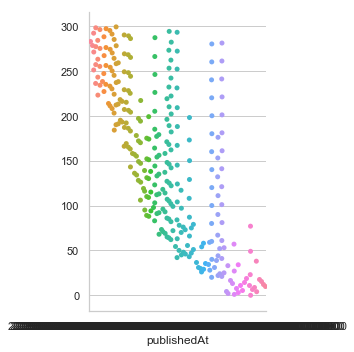

In [548]:
sns.catplot(x = 'publishedAt', y = '', data = brex_news_mpl,height=5)

In [549]:
brex_news_mpl.content.count()

291